In [24]:

pip install matplotlib


     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.8 kB 435.7 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 657.6 kB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 886.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.7 MB 2.6 MB/s eta 0:00:03
   - -------------------------------------- 0.2/7.7 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.7 MB 3.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.7 MB 3.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.7 MB 4.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.5/7.7 MB 5.1 MB/s eta 0:00:02
   --------- -

In [13]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [7]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [14]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [15]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [16]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data

# Set the coinid column as index

df_scaled_market_data = pd.DataFrame(
    scaled_data,
    index=df_market_data.index,
    columns=df_market_data.columns
)
# Display sample data

df_scaled_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [17]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [89]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled_market_data)
    inertia_values.append(kmeans.inertia_)

In [90]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

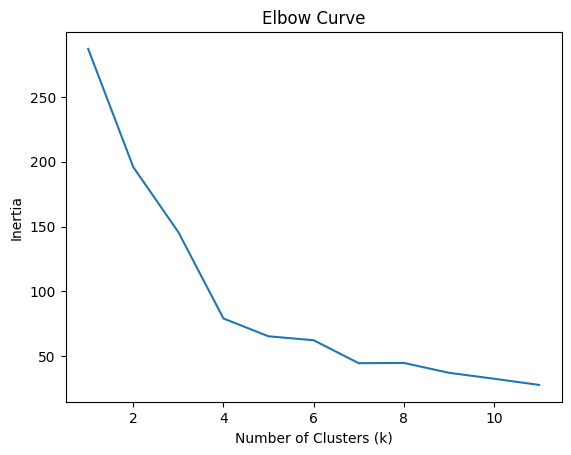

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed
plt.plot(df_elbow_data['k_values'], df_elbow_data['inertia_values'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---The Best value of k is 4

### Cluster Cryptocurrencies with K-means Using the Original Data

In [26]:
# Initialize the K-Means model using the best value for k
k = 4

In [28]:
# Fit the K-Means model using the scaled data
X_scaled = scaler.fit_transform(df_scaled_market_data)
kmeans = KMeans(n_clusters=k, random_state=42) # Assuming you want to find 3 clusters
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans.predict(df_scaled_market_data)

# Print the resulting array of cluster values.
print(cluster_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [31]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [32]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['clusters'] = kmeans.predict(df_scaled_market_data)

# Display sample data
df_market_data_copy.head(10)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas

# Assuming df is your DataFrame and kmeans is your KMeans model
df_market_data_copy["kmeans_labels"] = kmeans.labels_
plot = df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="kmeans_labels",
    hover_cols=["name"],
)
plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,kmeans_labels)

---

### Optimize Clusters with Principal Component Analysis.

In [35]:
# Create a PCA model instance and set `n_components=3`.

from sklearn.decomposition import PCA
pca_model = PCA(n_components=3)

In [52]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

pca_data = pca_model.fit_transform(scaled_data)

import pandas as pd


# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df.head(5)

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [53]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
print(explained_variance)


total_explained_variance = explained_variance[0] + explained_variance[1] + explained_variance[2]
print(total_explained_variance)

[0.3719856  0.34700813 0.17603793]
0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895031657030984

In [64]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data



# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

pca_df

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715
5,-0.516534,1.388377,0.804071
6,-0.450711,0.517699,2.846143
7,-0.345600,0.729439,1.478013
8,-0.649468,0.432165,0.600303
9,-0.759014,-0.201200,-0.217653


---

### Find the Best Value for k Using the PCA Data

In [47]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [68]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

In [69]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


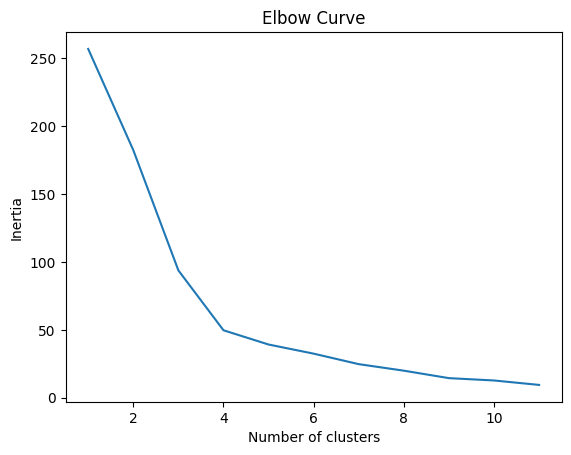

In [70]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.plot(elbow_df['k_values'], elbow_df['inertia'])
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Not any difference 
  

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
k = 4 

In [71]:
# Fit the K-Means model using the PCA data
kmeans_pca = KMeans(n_clusters=k)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=11)

In [78]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values
print(cluster_predictions)

[ 0  6  3  9  4  6 10  6  0  9  7  3  9  4  9  0  7  9  6  3  7  0  3  9
  3  3  9  7  6  5  9  9  1  0  8  3  2  7  0  3  3]


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [85]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_clusters['clusters'] = kmeans_pca.predict(pca_df)

# Display sample data
df_market_data_pca_clusters.head()

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,PC1,PC2,PC3,clusters
0,-0.600667,0.842760,0.461595,0
1,-0.458261,0.458466,0.952877,6
2,-0.433070,-0.168126,-0.641752,3
3,-0.471835,-0.222660,-0.479053,9
4,-1.157800,2.041209,1.859715,4


In [86]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

plot = df_market_data_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="clusters",
    hover_cols=["name"],
)
plot


:Scatter   [PC1]   (PC2,clusters)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

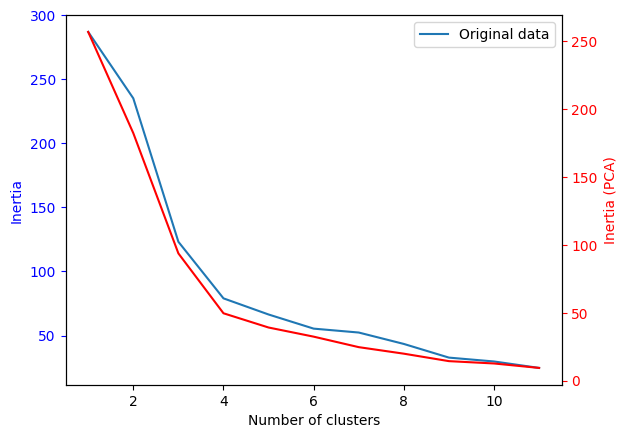

In [97]:
# Composite plot to contrast the Elbow curves
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the Elbow curve for the original data
ax1.plot(df_elbow_data['k_values'], df_elbow_data['inertia_values'])
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for the Elbow curve for the PCA data
ax2 = ax1.twinx()

# Plot the Elbow curve for the PCA data
ax2.plot(elbow_df['k_values'], elbow_df['inertia'], color='r')
ax2.set_ylabel('Inertia (PCA)', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
ax1.legend(['Original data', 'PCA data'])

# Show the plot
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_7208\2230143518.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(df_market_data_copy['price_change_percentage_24h'], df_market_data_copy['price_change_percentage_7d'], df_market_data_copy['clusters'], cmap='viridis')


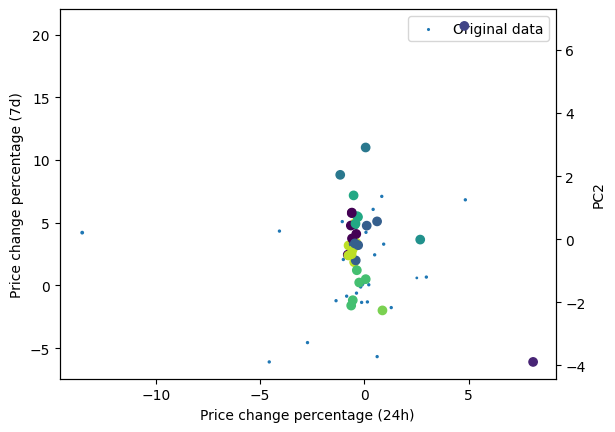

In [100]:
# Composite plot to contrast the clusters


# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the scatter plot for the original data
ax1.scatter(df_market_data_copy['price_change_percentage_24h'], df_market_data_copy['price_change_percentage_7d'], df_market_data_copy['clusters'], cmap='viridis')
ax1.set_xlabel('Price change percentage (24h)')
ax1.set_ylabel('Price change percentage (7d)')

# Create a second y-axis for the scatter plot for the PCA data
ax2 = ax1.twinx()

# Plot the scatter plot for the PCA data
ax2.scatter(df_market_data_pca_clusters['PC1'], df_market_data_pca_clusters['PC2'], c=df_market_data_pca_clusters['clusters'], cmap='viridis')
ax2.set_ylabel('PC2')

# Add a legend
ax1.legend(['Original data', 'PCA data'])

# Show the plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** k-means is more essicient to work to process original data